- Retropropagação
    - backpropagation

- Derivada

In [2]:
# !pip install micrograd
!pip install numpy
!pip install matplotlib

In [3]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

In [5]:
((3000 * 2) / 60) / 60

1.6666666666666667

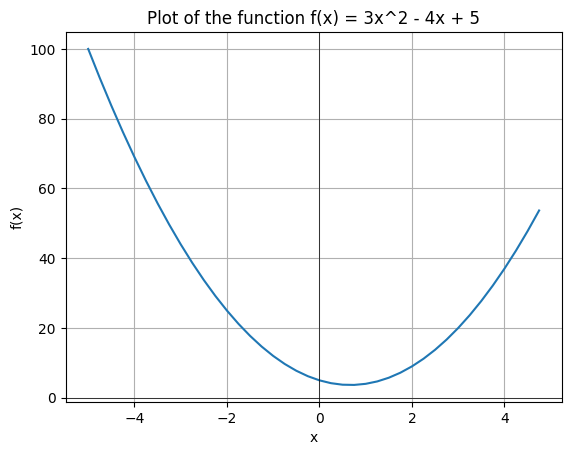

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.title("Plot of the function f(x) = 3x^2 - 4x + 5")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

In [7]:
x = 3.0
h = 0.001

inclinacao_derivada = (f(x + h) - f(x)) / h 

inclinacao_derivada

14.00300000000243

In [ ]:
def calcula_y(x):
  return 3 * x**2 - 4 * x + 5


# Vamos analisar no ponto x = 3.0
x_entrada = 3.0
y_saida = calcula_y(x_entrada)

print(f"Para x = {x_entrada}, y = {y_saida}") # Saída: Para x = 3.0, y = 20.0

Para x = 3.0, y = 20.0


In [4]:
# Definimos um "empurrãozinho" (h): h será um valor bem pequeno
h = 0.0001

y_saida_com_nudge = calcula_y(x_entrada + h)
print(f"Para x + h = {x_entrada + h}, y_com_nudge = {y_saida_com_nudge}")
# Saída aproximada: Para x + h = 3.0001, y_com_nudge = 20.014003

delta_y = y_saida_com_nudge - y_saida
print(f"A mudança em y (delta_y) foi: {delta_y}")
# Saída aproximada: A mudança em y (delta_y) foi: 0.01400300000000091

derivada_aproximada = delta_y / h
print(f"A derivada aproximada de y em relação a x em x={x_entrada} é: {derivada_aproximada}")
# Saída aproximada: A derivada aproximada de y em relação a x em x=3.0 é: 14.0030000000091

Para x + h = 3.0001, y_com_nudge = 20.001400030000006
A mudança em y (delta_y) foi: 0.0014000300000063248
A derivada aproximada de y em relação a x em x=3.0 é: 14.000300000063248


In [5]:
def calcula_d(a, b, c):
  return a * b + c

# Ponto de análise
a_val = 2.0
b_val = -3.0
c_val = 10.0

d_saida = calcula_d(a_val, b_val, c_val)
print(f"Para a={a_val}, b={b_val}, c={c_val}, d={d_saida}") # Saída: Para a=2.0, b=-3.0, c=10.0, d=4.0

Para a=2.0, b=-3.0, c=10.0, d=4.0


In [6]:
h = 0.0001

# Empurrando 'a'
d_saida_com_nudge_a = calcula_d(a_val + h, b_val, c_val)
delta_d_por_a = d_saida_com_nudge_a - d_saida
derivada_parcial_a = delta_d_por_a / h
print(f"Derivada parcial de d em relação a 'a': {derivada_parcial_a}")
# Saída: Derivada parcial de d em relação a 'a': -3.0000000000001137

Derivada parcial de d em relação a 'a': -3.000000000010772


In [7]:
# Empurrando 'b'
d_saida_com_nudge_b = calcula_d(a_val, b_val + h, c_val)
delta_d_por_b = d_saida_com_nudge_b - d_saida
derivada_parcial_b = delta_d_por_b / h
print(f"Derivada parcial de d em relação a 'b': {derivada_parcial_b}")
# Saída: Derivada parcial de d em relação a 'b': 2.0000000000000018

Derivada parcial de d em relação a 'b': 2.0000000000042206


In [8]:
# Empurrando 'c'
d_saida_com_nudge_c = calcula_d(a_val, b_val, c_val + h)
delta_d_por_c = d_saida_com_nudge_c - d_saida
derivada_parcial_c = delta_d_por_c / h
print(f"Derivada parcial de d em relação a 'c': {derivada_parcial_c}")
# Saída: Derivada parcial de d em relação a 'c': 1.0000000000000009

Derivada parcial de d em relação a 'c': 0.9999999999976694


Impacto de c em d: se aumentarmos c em uma pequena unidade, d aumentará na mesma proporção (1 vez essa unidade), pois c é simplesmente somado.

Por que isso é Importante para Redes Neurais?
No contexto de redes neurais e do Micrograd:

- As "entradas" da sua função serão os pesos da rede neural (e os dados de entrada).
- A "saída" será a função de perda (um número que diz o quão errada está a previsão da rede).
- Calculando a derivada da perda em relação a cada peso, descobrimos a "sensibilidade" da perda a cada peso.
Ou seja, descobrimos o quanto a perda aumenta ou diminui se dermos um "empurrãozinho" em um peso específico.
- Essa informação (o gradiente) é usada para ajustar os pesos de forma a minimizar a perda, fazendo a rede aprender. Se um peso tem um gradiente positivo, significa que aumentar esse peso aumenta a perda; então, para diminuir a perda, precisamos diminuir esse peso.

O objeto `Value` no Micrograd vai armazenar não só o valor de um resultado de uma operação (`.data`), mas também a derivada da "saída final" (a perda) em relação a ele (`.grad`).

Esta explicação com foco em código e no conceito de "empurrar" as variáveis te ajudou a clarear a ideia de derivadas? Se sim, podemos prosseguir para o próximo tópico, que é como o objeto `Value` do Micrograd nos ajuda a rastrear essas influências automaticamente.